In [1]:
%matplotlib inline
from ANN_simulation import *

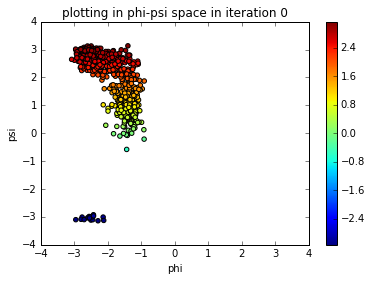

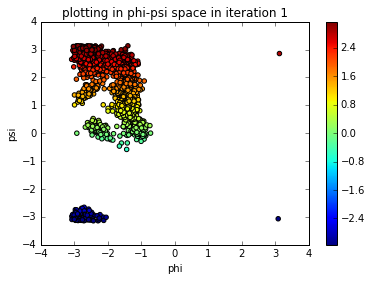

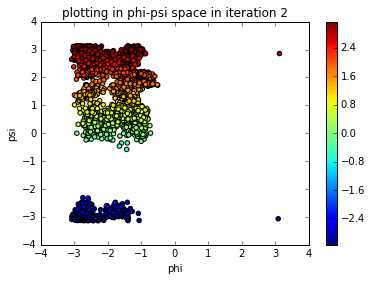

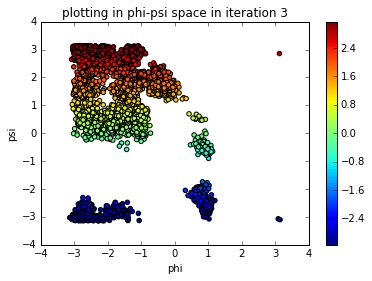

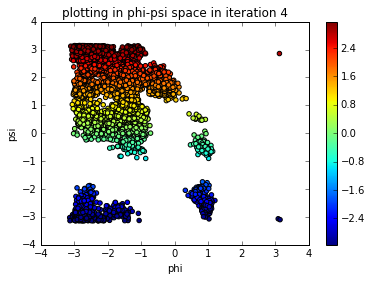

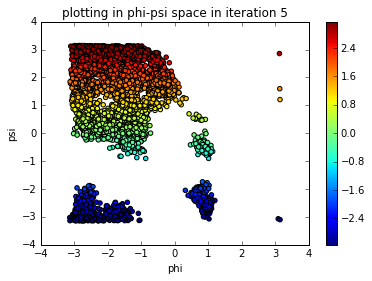

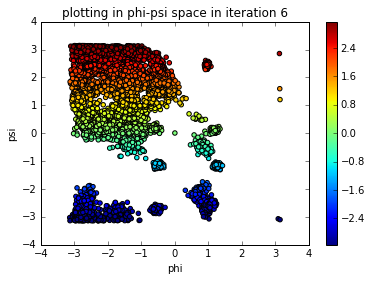

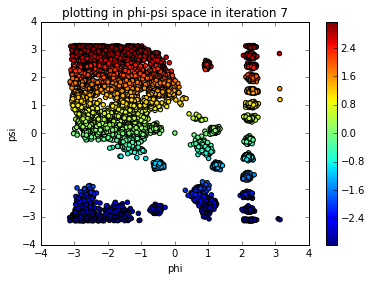

In [12]:
# fix autoencoder, compare different datasets
%matplotlib inline

root_dir = '../'

folder_list = [root_dir + 'target/unbiased/unbiased_output_coordinates.txt'] + \
               [root_dir + 'target/network_%d/' % item for item in range(1, 8)]
a=pickle.load(open(root_dir + 'resources/network_1.pkl','rb'))
my_file_list = []

i = 0

for i, item in enumerate(folder_list):
    
    b=plotting(a)
    my_file_list += coordinates_data_files_list([item])._list_of_coor_data_files
    cossin_data = sutils.get_many_cossin_from_coordiantes_in_list_of_files(my_file_list)
    color = [item[2] for item in sutils.get_many_dihedrals_from_coordinates_in_file(my_file_list)]
    temp_fig, _, _ = b.plotting_with_coloring_option(plotting_space = "phipsi",
                                        cossin_data_for_plotting = cossin_data,
                                        color_option='other', 
                                        other_coloring = color,
                                        axis_ranges=[[-4,4],[-4,4]],
                                        title="plotting in phi-psi space in iteration %d" % i
                                        )
    temp_fig.savefig('iteration_%d.png' % i)
    
plt.show()

FVE = 0.534392
FVE = 0.496251
FVE = 0.406945
FVE = 0.316906
FVE = 0.270926
FVE = 0.438277
FVE = 0.469050


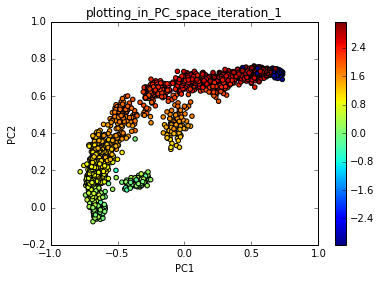

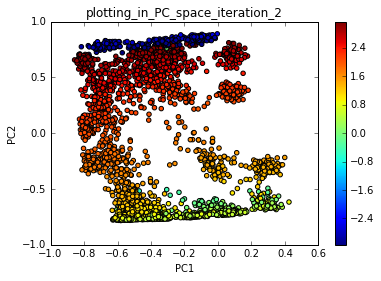

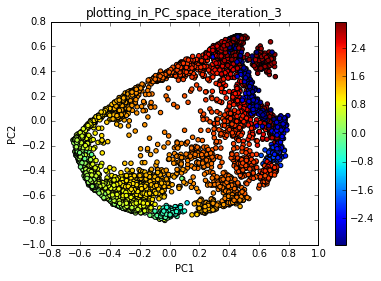

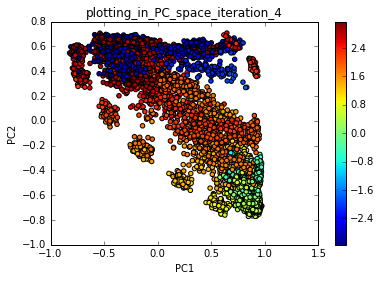

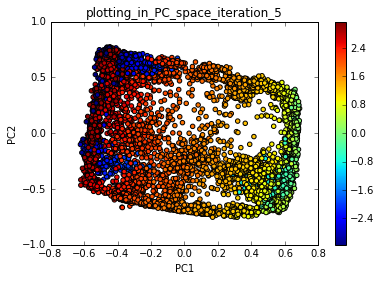

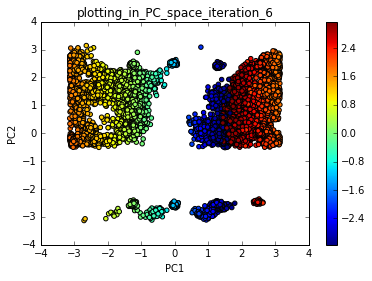

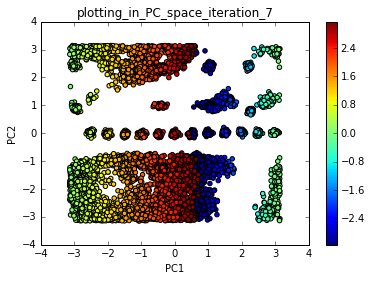

In [17]:
%matplotlib inline
from ANN_simulation import *

# fix dataset, compare different autoencoders

root_dir = '../'
folder_list = [root_dir + 'target/unbiased/unbiased_output_coordinates.txt'] + \
               [root_dir + 'target/network_%d/' % item for item in range(1, 8)]
my_file_list = []

for i, item in enumerate(folder_list):
    my_file_list += coordinates_data_files_list([item])._list_of_coor_data_files
    if i != 0: 
        a=pickle.load(open(root_dir + 'resources/network_%d.pkl' % i,'rb'))
        print("FVE = %f" % a.get_fraction_of_variance_explained())

        b=plotting(a)

        cossin_data = sutils.get_many_cossin_from_coordiantes_in_list_of_files(my_file_list)

        temp_fig, _, _ = b.plotting_with_coloring_option(plotting_space = "PC",
                                            cossin_data_for_plotting=cossin_data, 
                                            color_option='psi', 
                                            title = "plotting_in_PC_space_iteration_%d" % i
                                            )
        temp_fig.savefig('plotting_in_PC_space_iteration_%d.png' % i)

    
plt.show()

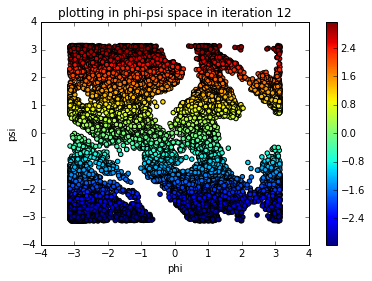

In [3]:
root_dir = '../previous_runs/snapshot_2015_11_28_14_48_30(finish_27_iterations_and_WHAM)/'

a=pickle.load(open(root_dir + 'resources/network_1.pkl','rb'))
my_file_list = coordinates_data_files_list([root_dir])._list_of_coor_data_files

    
b=plotting(a)
cossin_data = sutils.get_many_cossin_from_coordiantes_in_list_of_files(my_file_list)
color = [item[2] for item in sutils.get_many_dihedrals_from_coordinates_in_file(my_file_list)]
temp_fig = b.plotting_with_coloring_option(plotting_space = "phipsi",
                                        cossin_data_for_plotting = cossin_data,
                                        color_option='other', 
                                        other_coloring = color,
                                        axis_ranges=[[-4,4],[-4,4]],
                                        title="plotting in phi-psi space in iteration %d" % i
                                        )
#     temp_fig.savefig('iteration_%d.png' % i)

In [3]:
mean = [0, 0]
cov = [[1, 0], [0, 100]]  # diagonal covariance

import matplotlib.pyplot as plt
import numpy as np

x, y = np.random.multivariate_normal(mean, cov, 5000).T

hist, _, _ = np.histogram2d(x, y)

In [10]:
hist
im = plt.imshow(hist)
plt.show()

In [18]:
# temp
from ANN_simulation import *

root_dir = '../'
    
my_file_list = coordinates_data_files_list([root_dir + 'target/network_8/100/'])._list_of_coor_data_files

    
a=pickle.load(open(root_dir + 'resources/network_8.pkl','rb'))
print("FVE = %f" % a.get_fraction_of_variance_explained())

b=plotting(a)

cossin_data = sutils.get_many_cossin_from_coordiantes_in_list_of_files(my_file_list)

temp_fig, _, _ = b.plotting_with_coloring_option(plotting_space = "PC",
                                    cossin_data_for_plotting=cossin_data, 
                                    color_option='psi', 
                                    title = "plotting_in_PC_space_iteration_8"
                                    )
# temp_fig.savefig('plotting_in_PC_space_iteration_%d.png' % i)

    
plt.show()

FVE = 0.463976


In [3]:
# see FVE with network with CircularLayer

from ANN_simulation import *
from multiprocessing import Pool

def train_network_with_diff_num_of_PC(num_of_PC):
    my_file_list = coordinates_data_files_list(['../target/'])._list_of_coor_data_files
    cossin_data = sutils.get_many_cossin_from_coordiantes_in_list_of_files(my_file_list)

    a = neural_network_for_simulation(index=1, 
                                      training_data_interval = 2,
                                      data_set_for_training= cossin_data,
                                      node_num = [8, 12, 2 * num_of_PC, 12, 8],   # circular
                                      hidden_layers_types=[TanhLayer, CircularLayer, TanhLayer],
                                      max_num_of_training=50
                                     )
    a.train()
    a.save_into_file('network_with_PC_%d.pkl' % num_of_PC)
    
    print("num_of_PC = %d, FVE = %f\n" % (num_of_PC, a.get_fraction_of_variance_explained()))
    return

p = Pool(4)
p.map(train_network_with_diff_num_of_PC, range(1,5) )

start training network with index = 1, training maxEpochs = 50
start training network with index = 1, training maxEpochs = 50
start training network with index = 1, training maxEpochs = 50
start training network with index = 1, training maxEpochs = 50




Done training network with index = 1, training maxEpochs = 50
Done training network with index = 1, training maxEpochs = 50
Done training network with index = 1, training maxEpochs = 50
Done training network with index = 1, training maxEpochs = 50




num_of_PC = 1, FVE = 0.330243
num_of_PC = 3, FVE = 0.538293
num_of_PC = 4, FVE = 0.571236
num_of_PC = 2, FVE = 0.485440






/home/fisiksnju/.anaconda2/lib/python2.7/site-packages/numpy/lib/npyio.py:891: UserWarning: loadtxt: Empty input file: "../target/network_6/biased_output_fc_500_x1_-2.51_x2_-2.51_coordinates.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/home/fisiksnju/.anaconda2/lib/python2.7/site-packages/numpy/lib/npyio.py:891: UserWarning: loadtxt: Empty input file: "../target/network_6/biased_output_fc_500_x1_-2.51_x2_-2.51_coordinates.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/home/fisiksnju/.anaconda2/lib/python2.7/site-packages/numpy/lib/npyio.py:891: UserWarning: loadtxt: Empty input file: "../target/network_6/biased_output_fc_500_x1_-2.51_x2_-2.51_coordinates.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)
/home/fisiksnju/.anaconda2/lib/python2.7/site-packages/numpy/lib/npyio.py:891: UserWarning: loadtxt: Empty input file: "../target/network_6/biased_output_fc_500_x1_-2.51_x2_-2.51_coordinates.txt"
  warnings.warn('loadtxt: Empty input f

[None, None, None, None]

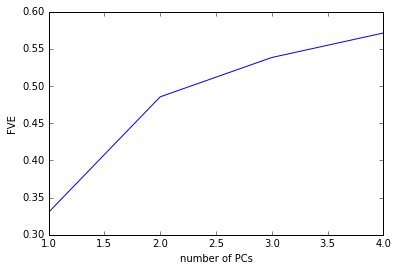

In [6]:
%matplotlib inline

FVE_info = [0.330243, 0.485440, 0.538293, 0.571236]
plt.plot(range(1,5), FVE_info)
plt.xlabel('number of PCs')
plt.ylabel('FVE')
plt.show()